In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE


In [2]:
random_state = 42

In [3]:
# #load data on Yanqi Hong's computer
# data = pd.read_csv('E:\DATA\TUD\Master\TUD_Master_Y1\Q1\EE4C12 Machine Learning For Electrical Engineering\CodeLab\Project\S&S_SZD (1)\Data\Project_Data_EE4C12_S&S_SZD.csv')
# data

# load data on Zhixuan's computer
data = pd.read_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\S&S_SZD\Project_Data_EE4C12_S&S_SZD.csv')
data

,Patient,annotation,min|FP1-F7,min|F7-T3,min|T3-T5,min|T5-O1,min|FP2-F8,min|F8-T4,min|T4-T6,min|T6-O2,...,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
0,258,1,50,61,57,53,39,35,39,35,...,0.016087,0.066920,0.102402,0.481384,0.690787,0.154544,0.062533,0.046460,0.066575,0.086999
1,258,1,48,62,60,46,38,35,39,33,...,0.024006,0.064857,0.031791,0.225788,0.409987,0.184671,0.071133,0.022369,0.079494,0.047536
2,258,1,51,60,59,45,38,36,40,36,...,0.037326,0.100177,0.050009,0.622584,0.394504,0.225516,0.050673,0.044906,0.102142,0.068105
3,258,1,49,58,56,42,36,36,41,37,...,0.027546,0.107883,0.014017,0.359140,0.276964,0.104977,0.018042,0.079467,0.078255,0.089385
4,258,1,45,57,61,41,35,37,41,37,...,0.036820,0.182520,0.031397,0.328354,0.156929,0.151952,0.047532,0.135071,0.098320,0.137701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55451,11580,-1,75,73,81,80,66,80,77,75,...,0.244334,0.625396,0.023821,0.058277,0.083594,0.114426,0.119654,0.295364,0.185930,0.199585
55452,11580,-1,74,74,77,71,79,75,82,77,...,0.588236,0.743060,0.076294,0.332341,0.228458,0.170603,0.351418,0.638666,0.490806,0.307429
55453,11580,-1,72,76,72,73,74,76,80,76,...,0.296041,0.770194,0.041190,0.090919,0.186074,0.216797,0.231053,0.770637,0.285257,0.413382
55454,11580,-1,77,82,74,75,82,85,80,76,...,0.440360,0.720855,0.026959,0.026340,0.077674,0.269610,0.186769,0.790173,0.473615,0.415771


In [5]:
# Cheak the statiscs
data.iloc[:, -20:].describe()

,norm_power_HF|FP1-F7,norm_power_HF|F7-T3,norm_power_HF|T3-T5,norm_power_HF|T5-O1,norm_power_HF|FP2-F8,norm_power_HF|F8-T4,norm_power_HF|T4-T6,norm_power_HF|T6-O2,norm_power_HF|T3-C3,norm_power_HF|C3-CZ,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
count,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000
mean,0.143207,0.166096,0.318655,0.208890,0.120581,0.198546,0.365322,0.285212,0.224814,0.192503,0.118722,0.229396,0.504768,1.396505,3.487550,2.066735,0.736794,0.944334,0.109339,0.109481
std,0.460419,0.338585,0.827370,0.803091,0.271087,0.349921,0.872625,1.011045,0.821695,0.503073,0.274724,0.484278,7.000175,27.629660,16.756869,8.863908,8.429259,11.958688,0.518148,0.524319
min,0.000018,0.000009,0.000014,0.000049,0.000079,0.000060,0.000068,0.000044,0.000044,0.000016,0.000044,0.000023,0.000047,0.000009,0.000006,0.000011,0.000030,0.000006,0.000012,0.000060
25%,0.001479,0.003081,0.003137,0.002884,0.004120,0.007385,0.006699,0.006609,0.002234,0.002692,0.003554,0.004216,0.002943,0.002408,0.002429,0.002479,0.005719,0.003619,0.004051,0.004649
50%,0.010076,0.019146,0.019964,0.016601,0.015845,0.036664,0.048685,0.026242,0.008028,0.007349,0.008913,0.023003,0.012475,0.010773,0.006801,0.006983,0.024925,0.014222,0.011859,0.012090
75%,0.092042,0.111453,0.148506,0.184182,0.106222,0.199627,0.408740,0.201710,0.081042,0.026490,0.044770,0.152983,0.118260,0.070366,0.038820,0.062326,0.122559,0.102257,0.053111,0.042975
max,16.575022,10.882275,12.773981,110.005657,9.264164,6.535206,32.817494,66.950408,35.761686,7.580624,6.356922,7.914311,480.037443,1834.428675,510.346412,237.442989,337.868165,566.736776,40.513872,54.898662


In [8]:
# mark time series

Patient_count = data['Patient'].value_counts(sort=False)
Patient_ID = Patient_count.index.values
Patient_num = len(Patient_ID)
Patient_ID_inv = dict(zip(Patient_ID, range(Patient_num)))


itp_idx = []
itp_idx.append(0)
for i in range(1, len(data)):
    if data['Patient'][i] != data['Patient'][i-1]:
        itp_idx.append(i)
itp_idx.append(len(data))

patient_data_list = []
for i in range(Patient_num):
    patient_data_list.append([]) 

for i in range(1, len(itp_idx)):
    data_temp = data.iloc[itp_idx[i-1]:itp_idx[i]]
    Patient_temp = data_temp['Patient'].iloc[0]
    patient_data_list[Patient_ID_inv[Patient_temp]].append(data_temp)




In [13]:
patient_data_list[0][0]['norm_power_HF|P4-O2']

0      0.086999
1      0.047536
2      0.068105
3      0.089385
4      0.137701
         ...   
517    0.008916
518    0.024407
519    0.019169
520    0.028059
521    0.055720
Name: norm_power_HF|P4-O2, Length: 522, dtype: float64

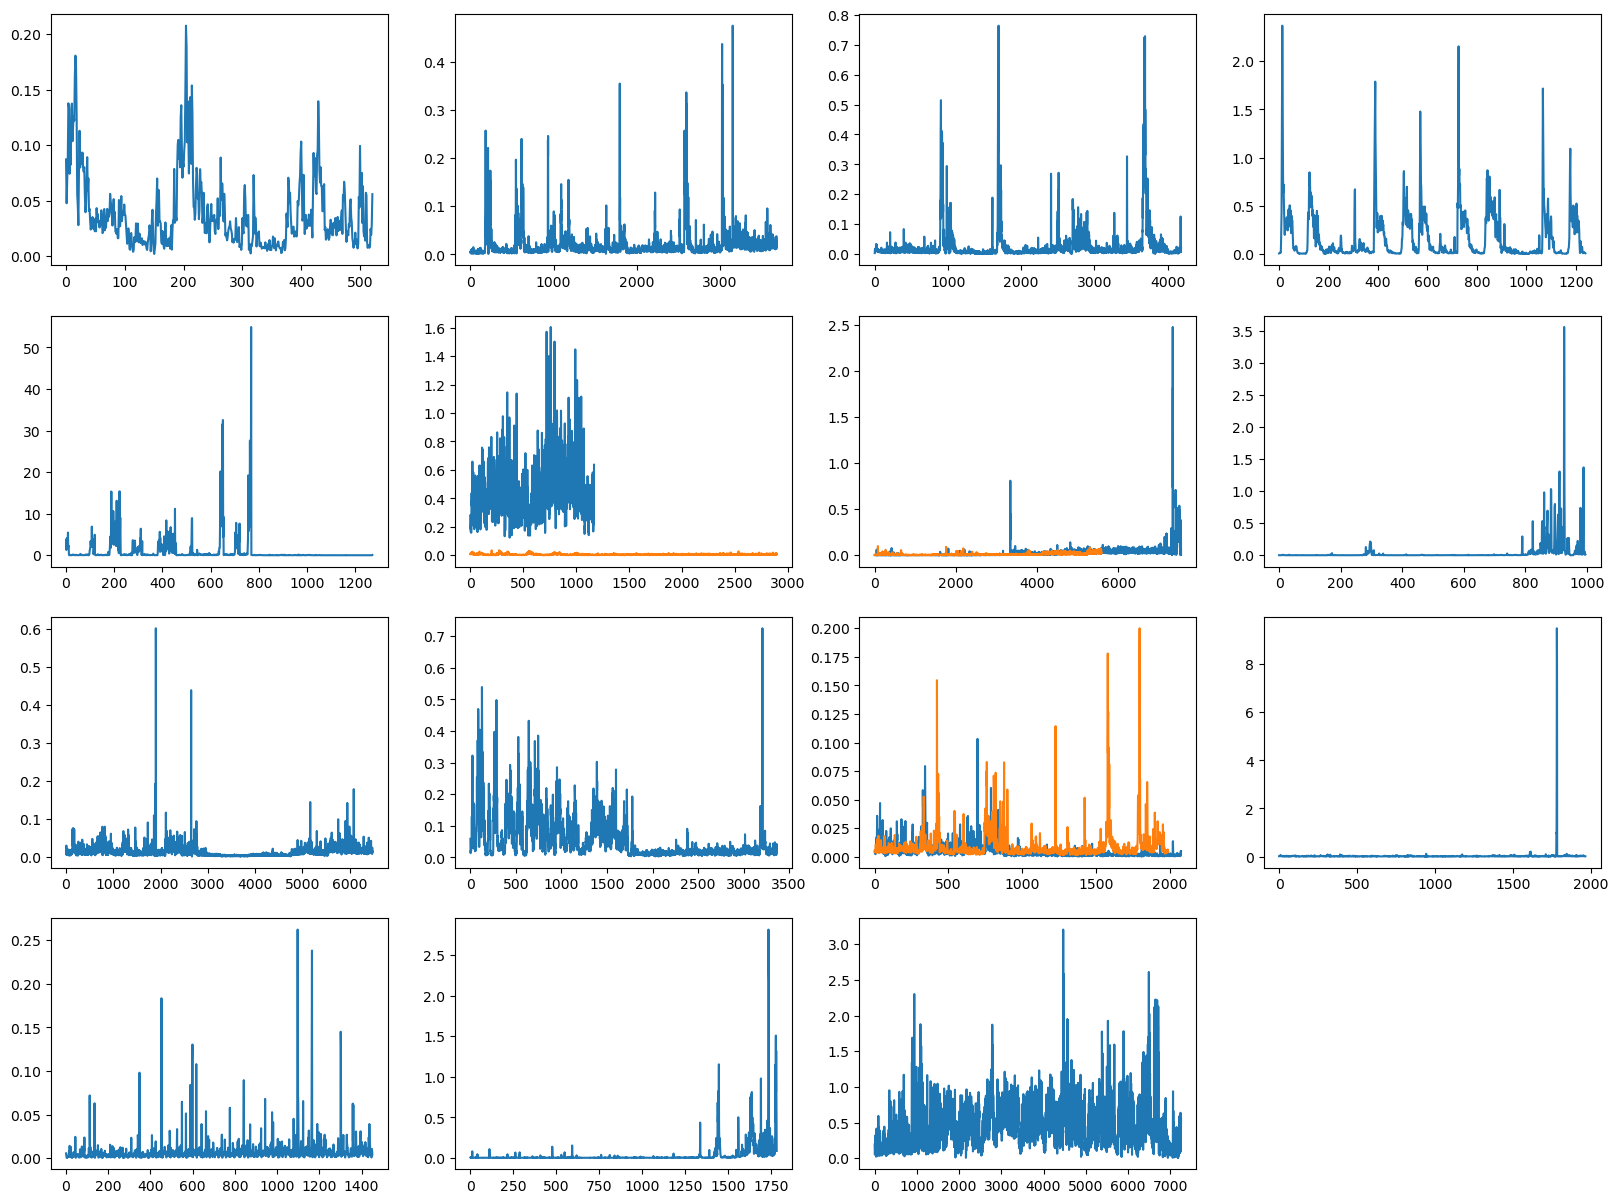

In [17]:
# plot time series
plt.figure(figsize=(20,15))
for i in range(15):
    plt.subplot(4, 4, i+1)
    for j in range(len(patient_data_list[i])):
        data_plot = patient_data_list[i][j]['norm_power_HF|P4-O2']
        x_plot = np.arange(len(data_plot))
        plt.plot(x_plot, data_plot)

In [9]:
# test train split first
test_size = 0.25
data_train, data_test = train_test_split(data, test_size=test_size, random_state=random_state, shuffle=True)

In [10]:
# scaling according to time series
X_train_scaled = np.zeros([0, 360])
X_test_scaled = np.zeros([0, 360])
y_train = np.zeros(0, dtype=int)
y_test = np.zeros(0, dtype=int)

for i in range(Patient_num):
    for j in range(len(patient_data_list[i])):
        idx_search = patient_data_list[i][j].index
        
        idx_search_train = data_train.index.intersection(idx_search)
        idx_search_test = data_test.index.intersection(idx_search)
        
        data_search_train = data_train.loc[idx_search_train]
        data_search_test = data_test.loc[idx_search_test]
    
        X_search_train = data_search_train.iloc[:, 2:].values
        X_search_test = data_search_test.iloc[:, 2:].values
        
        scaler = StandardScaler().fit(X_search_train)
        X_search_train = scaler.transform(X_search_train)
        X_search_test = scaler.transform(X_search_test)
        
        X_train_scaled = np.concatenate((X_train_scaled, X_search_train), axis=0)
        X_test_scaled = np.concatenate((X_test_scaled, X_search_test), axis=0)
        
        y_train_search = np.int32(data_search_train['annotation'].values)
        y_test_search = np.int32(data_search_test['annotation'].values)
        
        y_train = np.concatenate((y_train, y_train_search))
        y_test = np.concatenate((y_test, y_test_search))
        
X_train_scaled, y_train = sklearn.utils.shuffle(X_train_scaled, y_train, random_state=random_state)
X_test_scaled, y_test = sklearn.utils.shuffle(X_test_scaled, y_test, random_state=random_state)